<a href="https://colab.research.google.com/github/leticiagcsilva/Supermarket-Sales-Predict/blob/main/Previs%C3%A3o_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Sales Predict

In [1]:
# Importando as bibliotecas:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sales = pd.read_csv('sample_data/supermarket_sales - Sheet1.csv')

Conjunto de dados disponível em: https://www.kaggle.com/aungpyaeap/supermarket-sales


### Exploração dos Dados

In [3]:
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [4]:
# Verificando o tamanho do nosso conjunto de dados (Linhas x Colunas):
sales.shape

(1000, 17)

In [5]:
# Identificando quais são as colunas de nosso conjunto de dados:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**DICIONÁRIO DE DADOS**

- **Invoice ID**: Número de identificação da fatura do recibo de venda gerado por computador;
- **Branch**: Filial do supercentro (estão disponíveis 3 filiais identificadas por A, B e C);
- **City**: Localização dos supercentros; 
- **Customer type**: Tipo de cliente, registado pelos Membros para clientes com cartão de sócio e Normal para sem cartão de sócio;
- **Gender**: Tipo de gênero do cliente;
- **Product Line**: Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens;
- **Unit price**: Preço de cada produto em $;
- **Quantity**: Número de produtos adquiridos por cliente; 
- **Tax**: taxa de imposto de 5% para compra do cliente;
- **Total**: preço total incluindo imposto;
- **Date**: Data da compra (Registro disponível de janeiro de 2019 a março de 2019);
- **Time**: Horário da compra (10h às 21h)
- **Payment**: Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Dinheiro, Cartão de crédito e Ewallet);
- **COGS**: Custo das mercadorias vendido;
- **Gross margin percentage**: Porcentagem da margem bruta;
- **Gross income**: Renda bruta;
- **Rating**: Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)


---
Observando o dicionário fornecido e comparando com as colunas que encontramos vemos que eles são correspondentes.


In [6]:
# Checando se o conjunto possui dados faltantes:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

O cunjunto aarentemente não possui nenhum valor nulo. Isso 

In [7]:
# Entendendo o tipo de dado de cada variável do conjunto:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Observamos já em nossa exploração superficial que temos as variáveis temporais **Date** e **Time** com formato *object*. Isso se torna um impencílio para aplicarmos análises temporais. Vamos convertê-las.

In [8]:
# Transformando a Data objeto em datetime:
  #Para evitar a perda ou reescrever os dados antigos vamos criar 
  #uma nova coluna para colocar a data com deu tipo convertido.

sales['date'] = pd.to_datetime(sales['Date'])
sales['date'].dtype

dtype('<M8[ns]')

In [9]:
# Transformando o Time objeto em datetime:
  #Para evitar a perda ou reescrever os dados antigos vamos criar 
  #uma nova coluna para colocar o tempo com deu tipo convertido.

sales['time'] = pd.to_datetime( sales['Time'])
sales['time'].dtype

dtype('<M8[ns]')

In [10]:
sales.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2021-06-30 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,2021-06-30 10:29:00


### Feature Engeneering

In [11]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [12]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,2021-06-30 13:08:00,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,2021-06-30 10:29:00,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,2021-06-30 13:23:00,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,2021-06-30 20:33:00,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,2021-06-30 10:37:00,8,2,2019


In [13]:
sales['Hour'] = (sales['time']).dt.hour 

#### Dummies

Uma *Dummie* nos permite utilizar variáveis categóricas dentro de modelos de *machine learning*. Como o objetivo final desse pipeline é gerar um preditor de vendas, vamos transformar nossas variáveis categóricas em dummies.

In [ ]:
# Gênero
gender_dummies  = pd.get_dummies(sales['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


### Visualização de Dados

Vamos fazer algumas explorações no nosso conjunto a fim de obter alguns insights

In [14]:
# Calculando algumas estatísticas para os valores numéricos do conjunto:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


#### Gênero

In [15]:
sales['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
sales['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


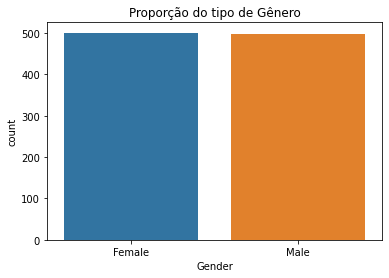

In [17]:
plt.figure()
plt.title("Proporção do tipo de Gênero")
sns.countplot(sales['Gender'])

In [19]:
#sns.catplot(x="Gender", kind="count", palette="Set2", data=sales);

Text(0.5, 1.0, 'Valor gasto por Gênero')

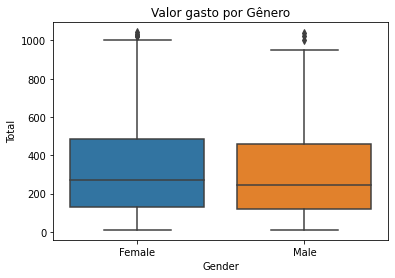

In [20]:
 sns.boxplot(x="Gender", y ="Total", data=sales).set_title("Valor gasto por Gênero")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


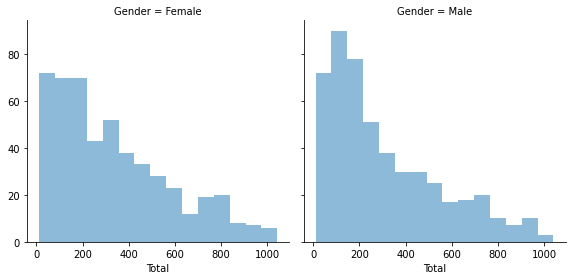

In [53]:
ge = sns.FacetGrid(sales, col='Gender', size=4)
ge.map(plt.hist, 'Total', alpha=0.5, bins=15)
ge.add_legend()
plt.show()

Text(0.5, 1.0, 'Nota por Gênero')

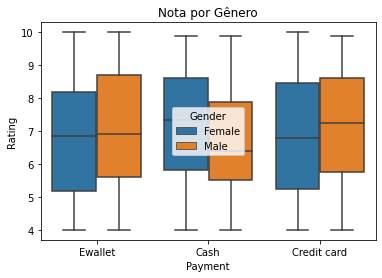

In [22]:
sns.boxplot(x="Payment", y ="Rating",hue='Gender', data=sales).set_title("Nota por Gênero")

Text(0.5, 1.0, 'Valor gasto por Gênero')

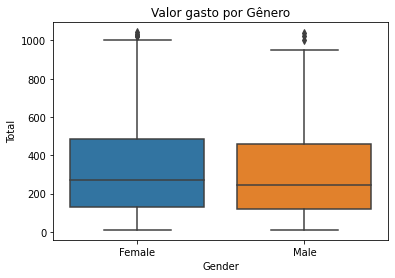

In [23]:
sns.boxplot(x="Gender", y ="Total", data=sales).set_title("Valor gasto por Gênero")

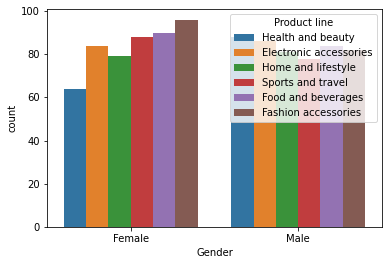

In [24]:
sns.countplot(x = "Gender", 
              hue = "Product line", 
              data = sales);

#### Quantidade

In [25]:
sales.Quantity.describe()

count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64

Text(0.5, 1.0, '')

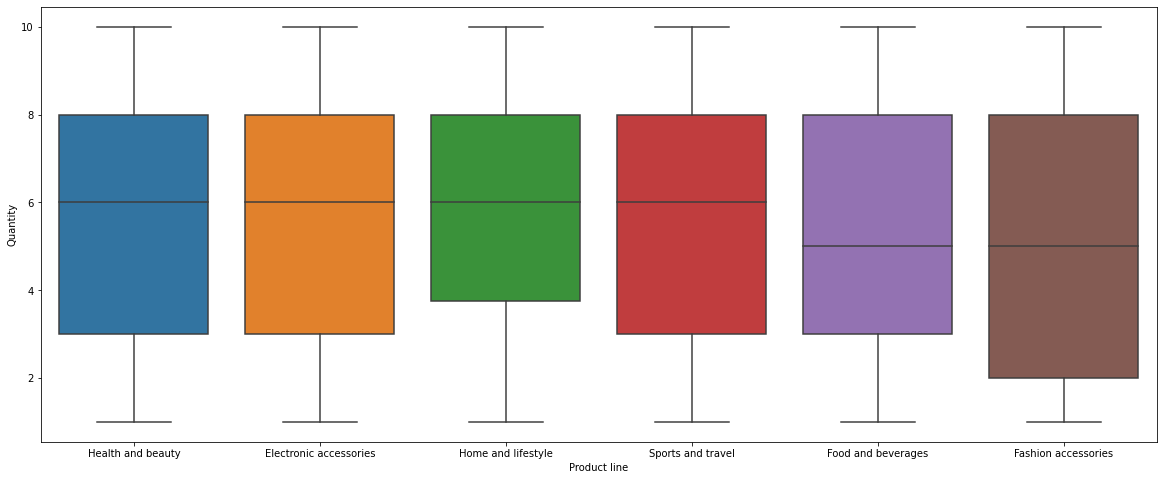

In [26]:
 plt.figure(figsize=(20,8))
 sns.boxplot(x="Product line", y ="Quantity", data=sales).set_title("")

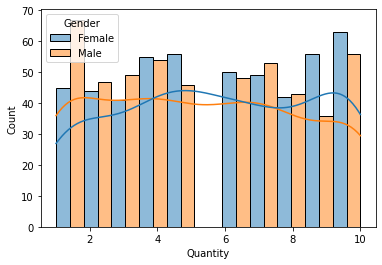

In [27]:
sns.histplot(data=sales, x="Quantity", kde=True, hue="Gender", multiple="dodge")

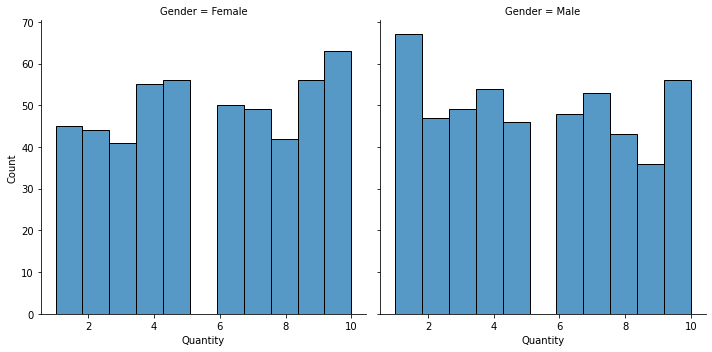

In [28]:
sns.displot(sales, x="Quantity", col="Gender", multiple="dodge")

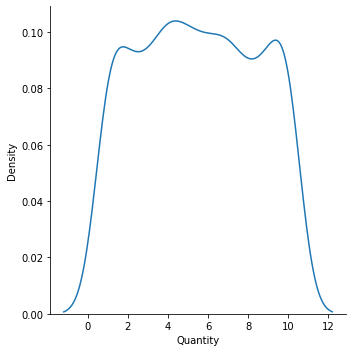

In [29]:
sns.displot(sales, x="Quantity", kind="kde")

#### Tipo de Pagamento

In [30]:
sales['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


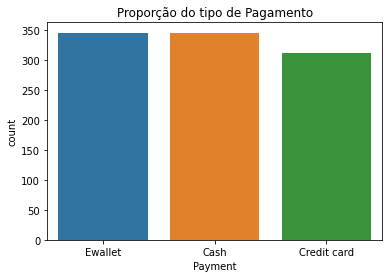

In [31]:
plt.figure()
plt.title("Proporção do tipo de Pagamento")
sns.countplot(sales['Payment'])

Text(0.5, 1.0, '')

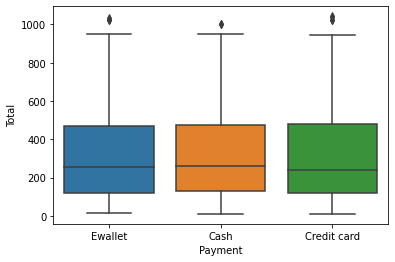

In [32]:
#plt.figure(figsize=(20,8))
sns.boxplot(x="Payment", y ="Total", data=sales).set_title("")

Text(0.5, 1.0, '')

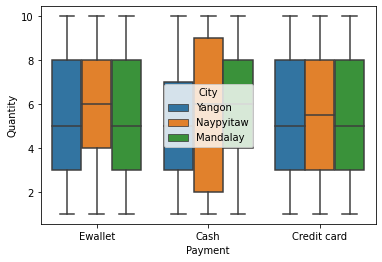

In [34]:
#plt.figure(figsize=(20,8))
sns.boxplot(x="Payment", y ="Quantity",hue="City", data=sales).set_title("")

#### Tipo de Cliente

In [35]:
sales['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


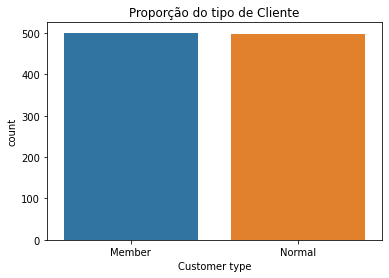

In [36]:
plt.title("Proporção do tipo de Cliente")
sns.countplot(sales['Customer type'])

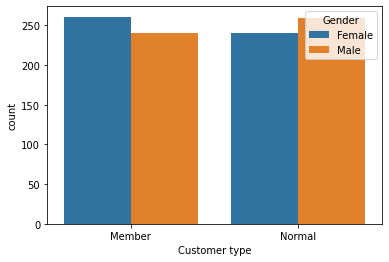

In [37]:
# countplot
sns.countplot(x = "Customer type", 
              hue = "Gender", 
              data = sales);

Ao observar-mos o gráfico acima temos que dos membros que efetuaram compras, a maioria eram mulheres. E dos não membros a maioria eram de homens. 

Text(0.5, 1.0, '')

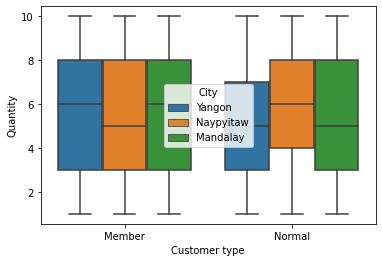

In [39]:
#plt.figure(figsize=(20,8))
sns.boxplot(x="Customer type", y ="Quantity",hue='City', data=sales).set_title("")

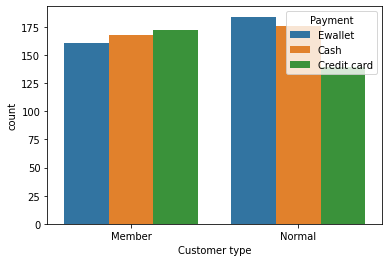

In [40]:
# countplot
sns.countplot(x = "Customer type", 
              hue = "Payment", 
              data = sales);

#### Valor Total

In [41]:
sales.Total.describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


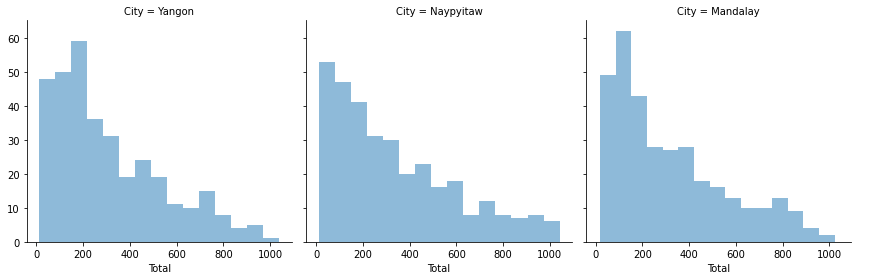

In [52]:
g = sns.FacetGrid(sales, col='City', size=4)
g.map(plt.hist, 'Total', alpha=0.5, bins=15)
g.add_legend()
plt.show()

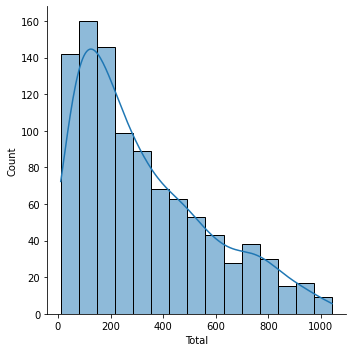

In [42]:
sns.displot(sales, x="Total", kde=True)

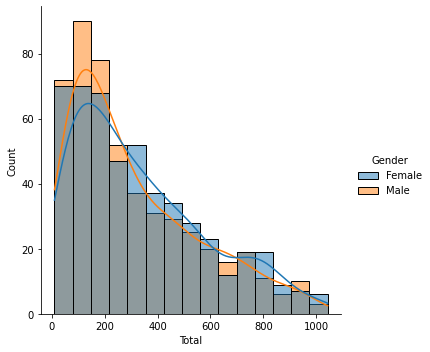

In [43]:
sns.displot(sales, x="Total", kde=True, hue="Gender")

#### Cidade

In [44]:
sales['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


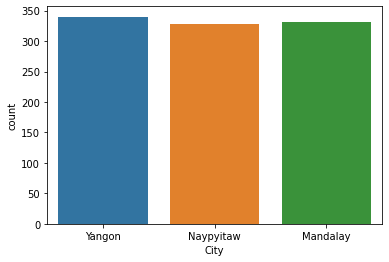

In [45]:
sns.countplot(sales['City'])

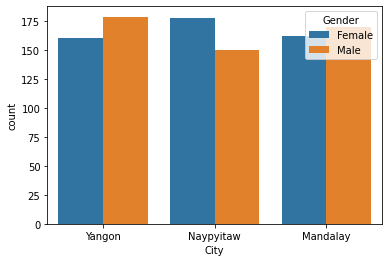

In [46]:
sns.countplot(x = "City", 
              hue = "Gender", 
              data = sales);

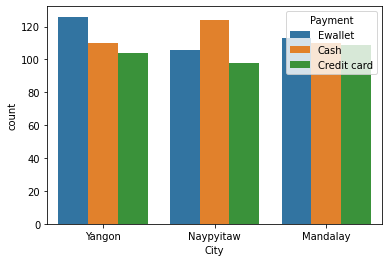

In [47]:
sns.countplot(x = "City", 
              hue = "Payment", 
              data = sales);

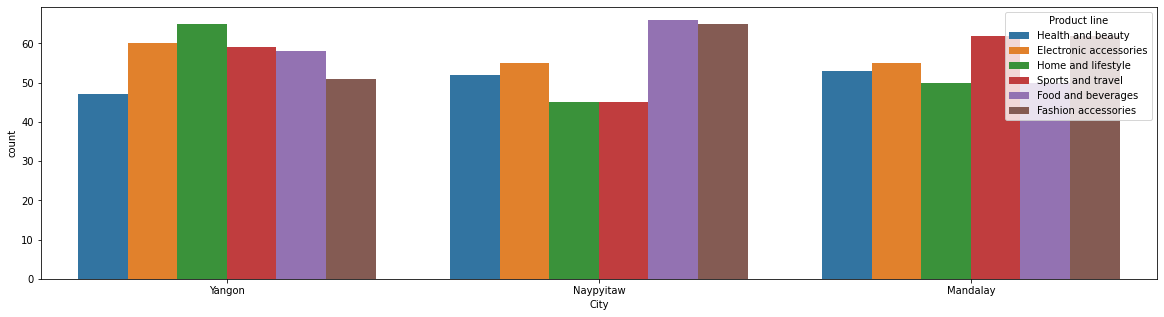

In [48]:
# countplot
plt.figure(figsize=(20,5))
sns.countplot(x = "City", 
              hue = "Product line", 
              data = sales);

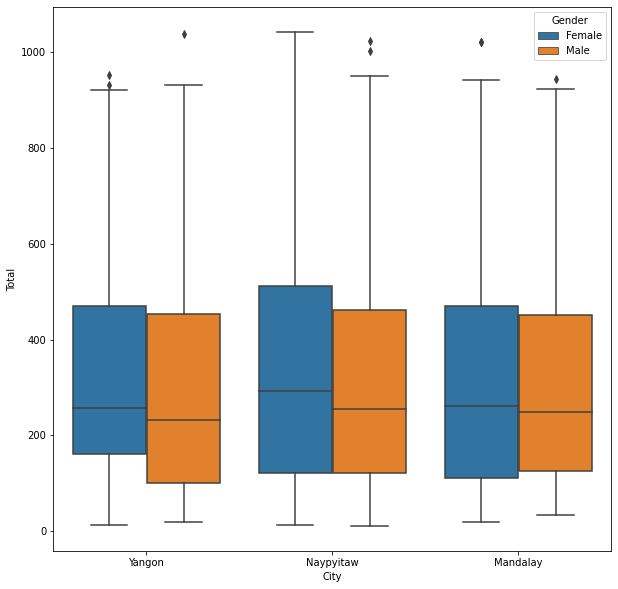

In [49]:
sns.boxplot(x='City', y='Total', data=sales,hue='Gender')
fig=plt.gcf()
fig.set_size_inches(10,10)

#### Análises

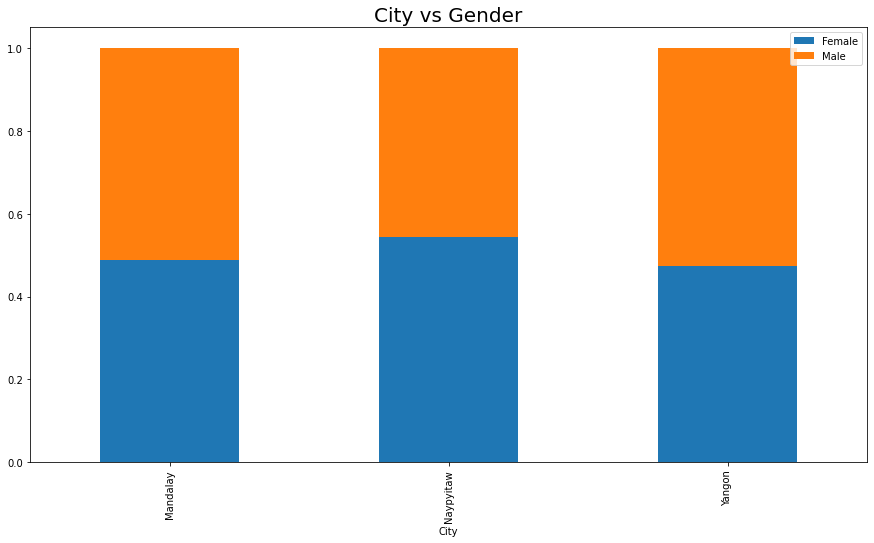

In [50]:
plt.rcParams['figure.figsize'] = (15, 8)
Y = pd.crosstab(sales['City'], sales['Gender'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('City vs Gender', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


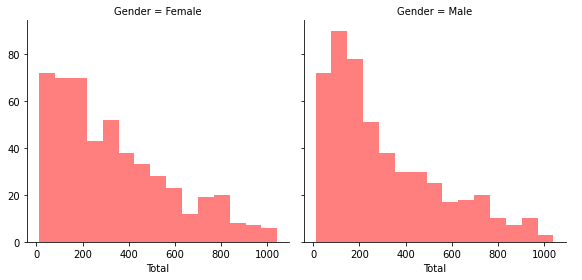

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


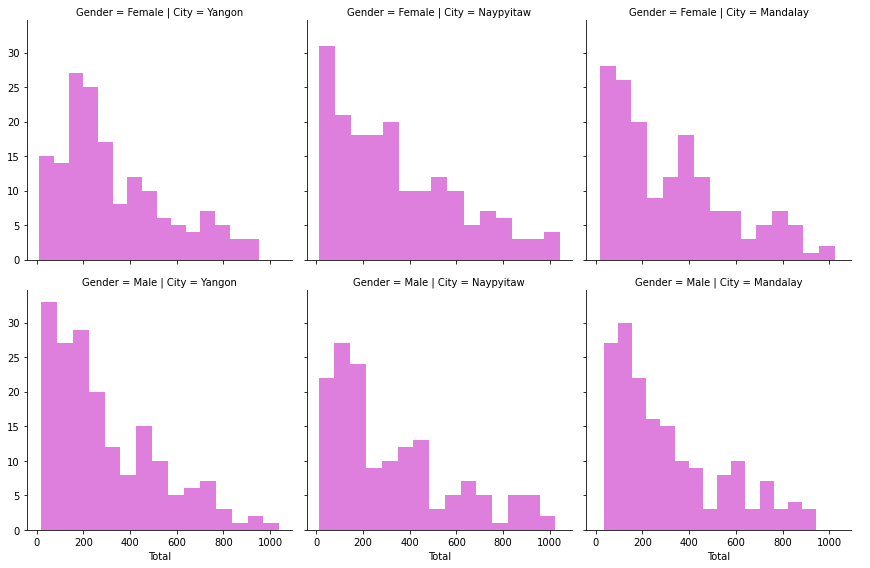

In [ ]:
g = sns.FacetGrid(sales, row='Gender', col='City', size=4)
# plt.title('distribution of Total categorised City and Gender ')
g.map(plt.hist, 'Total', alpha=0.5, bins=15,color='m')
g.add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gender, Female')

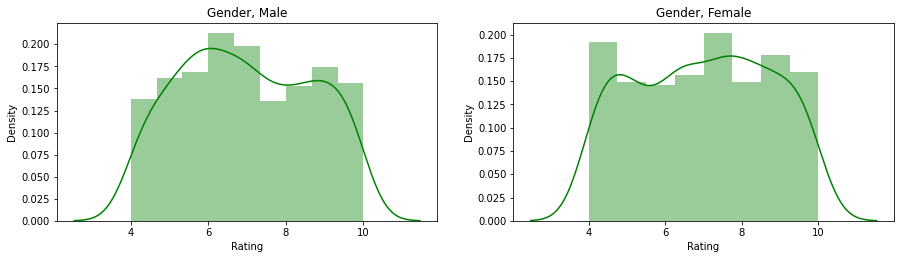

In [ ]:
plt.subplot(2,2,1)
dat = sales[sales['Gender']=='Male']
chart=sns.distplot(dat['Rating'], color='g')
plt.title('Gender, Male')

plt.subplot(2,2,2)
dat = sales[sales['Gender']=='Female']
chart=sns.distplot(dat['Rating'], color='g')
plt.title('Gender, Female')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Mandalay')

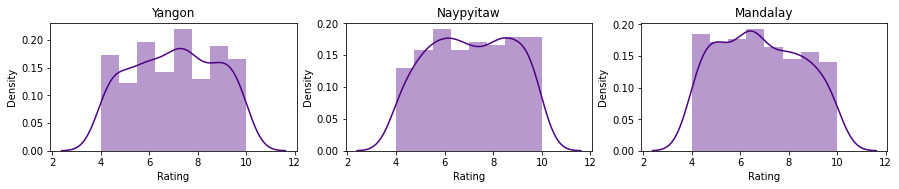

In [ ]:
df1 = sales[sales['City']=='Yangon']
df2 = sales[sales['City']=='Naypyitaw']
df3 = sales[sales['City']=='Mandalay']

plt.subplot(3,3,1)
sns.distplot(df1['Rating'],color='indigo')
plt.title('Yangon')

plt.subplot(3,3,2)
sns.distplot(df2['Rating'],color='indigo')
plt.title('Naypyitaw')

plt.subplot(3,3,3)
sns.distplot(df3['Rating'],color='indigo')
plt.title('Mandalay')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

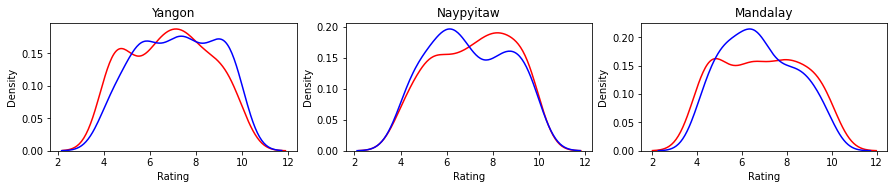

In [ ]:
su1=df1[df1['Gender']=='Female']
su2=df2[df2['Gender']=='Female']
su3=df3[df3['Gender']=='Female']

su_male1=df1[df1['Gender']=='Male']
su_male2=df2[df2['Gender']=='Male']
su_male3=df3[df3['Gender']=='Male']

plt.subplot(3,3,1)
plt.title('Yangon')
sns.distplot(su1['Rating'],color='r',hist=False,label="Female")
sns.distplot(su_male1['Rating'],color='b',hist=False,label="Male")


plt.subplot(3,3,2)
plt.title('Naypyitaw')
sns.distplot(su2['Rating'],color='r',hist=False,label="Female")
sns.distplot(su_male2['Rating'],color='b',hist=False,label="Male")

plt.subplot(3,3,3)
plt.title('Mandalay')
sns.distplot(su3['Rating'],color='r',hist=False,label="Female")
sns.distplot(su_male3['Rating'],color='b',hist=False,label="Male")

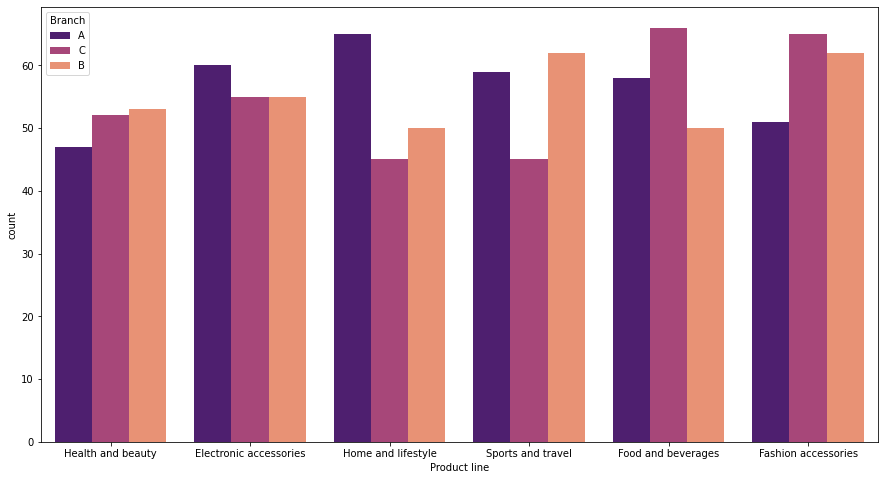

In [ ]:
sns.countplot(data = sales , x = 'Product line' , hue = 'Branch',palette = 'magma')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


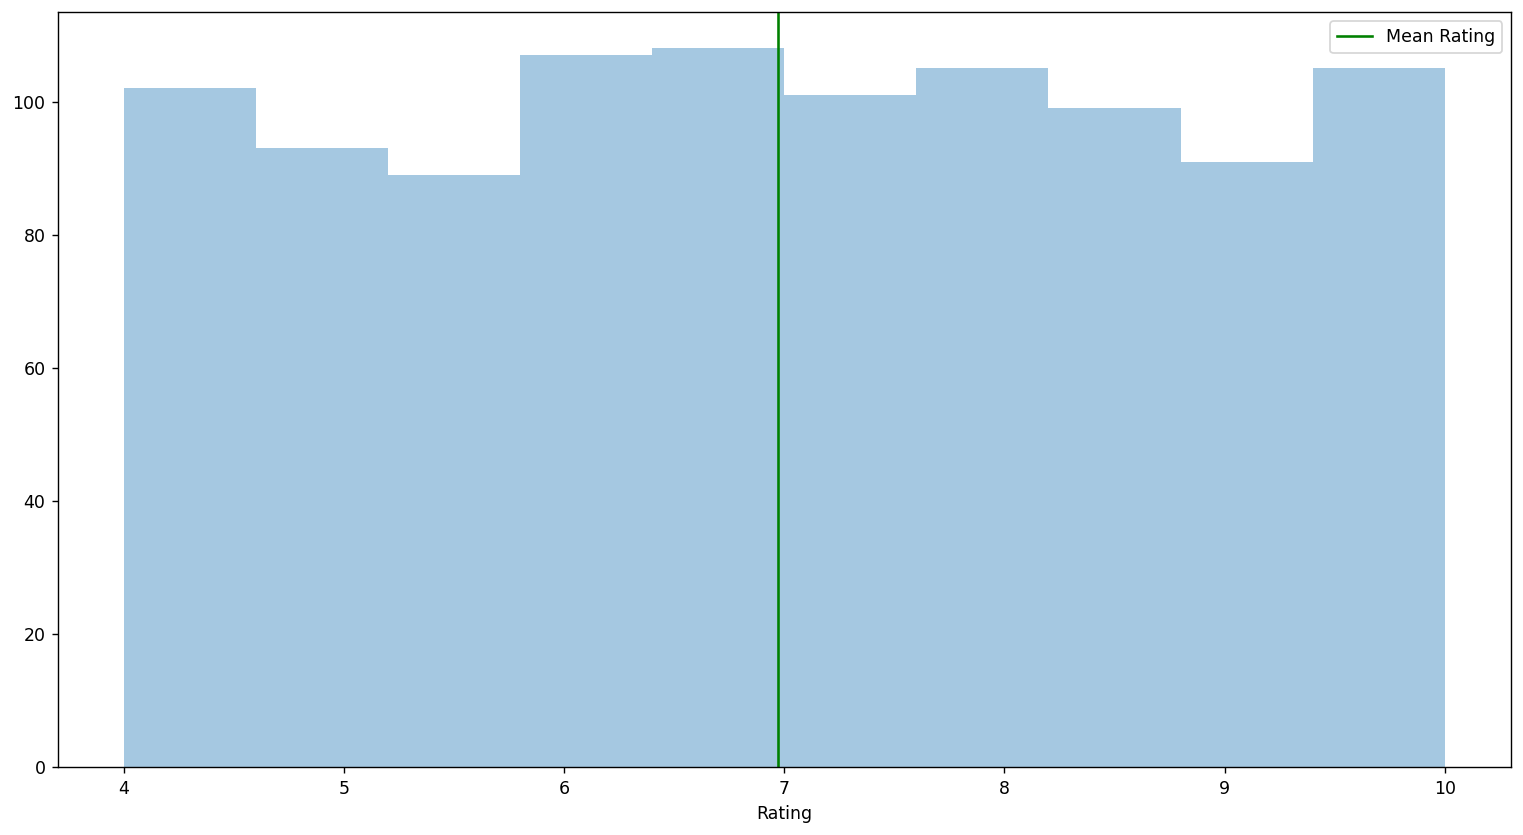

In [ ]:
# To find Mean Rating
plt.figure(dpi=125)
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

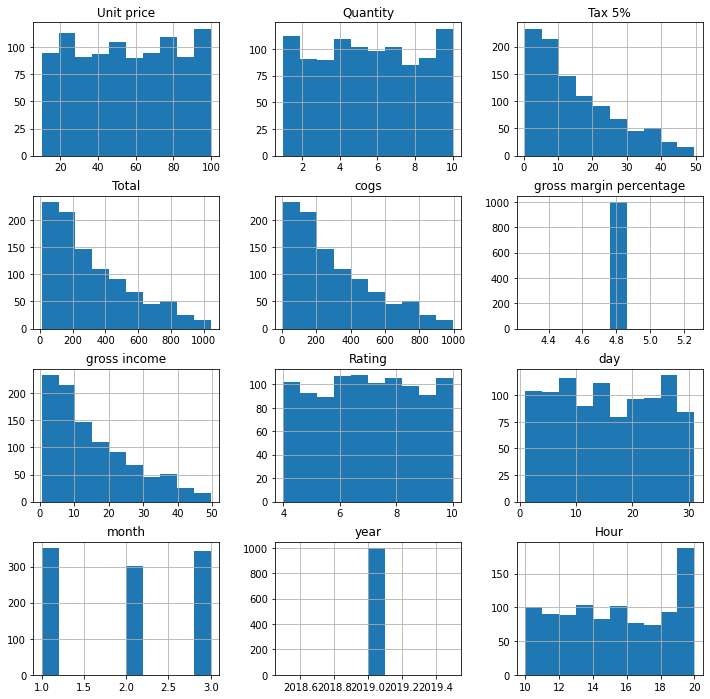

In [ ]:
# Plotting Histogram for all
sales.hist(figsize=(12,12))
plt.show()

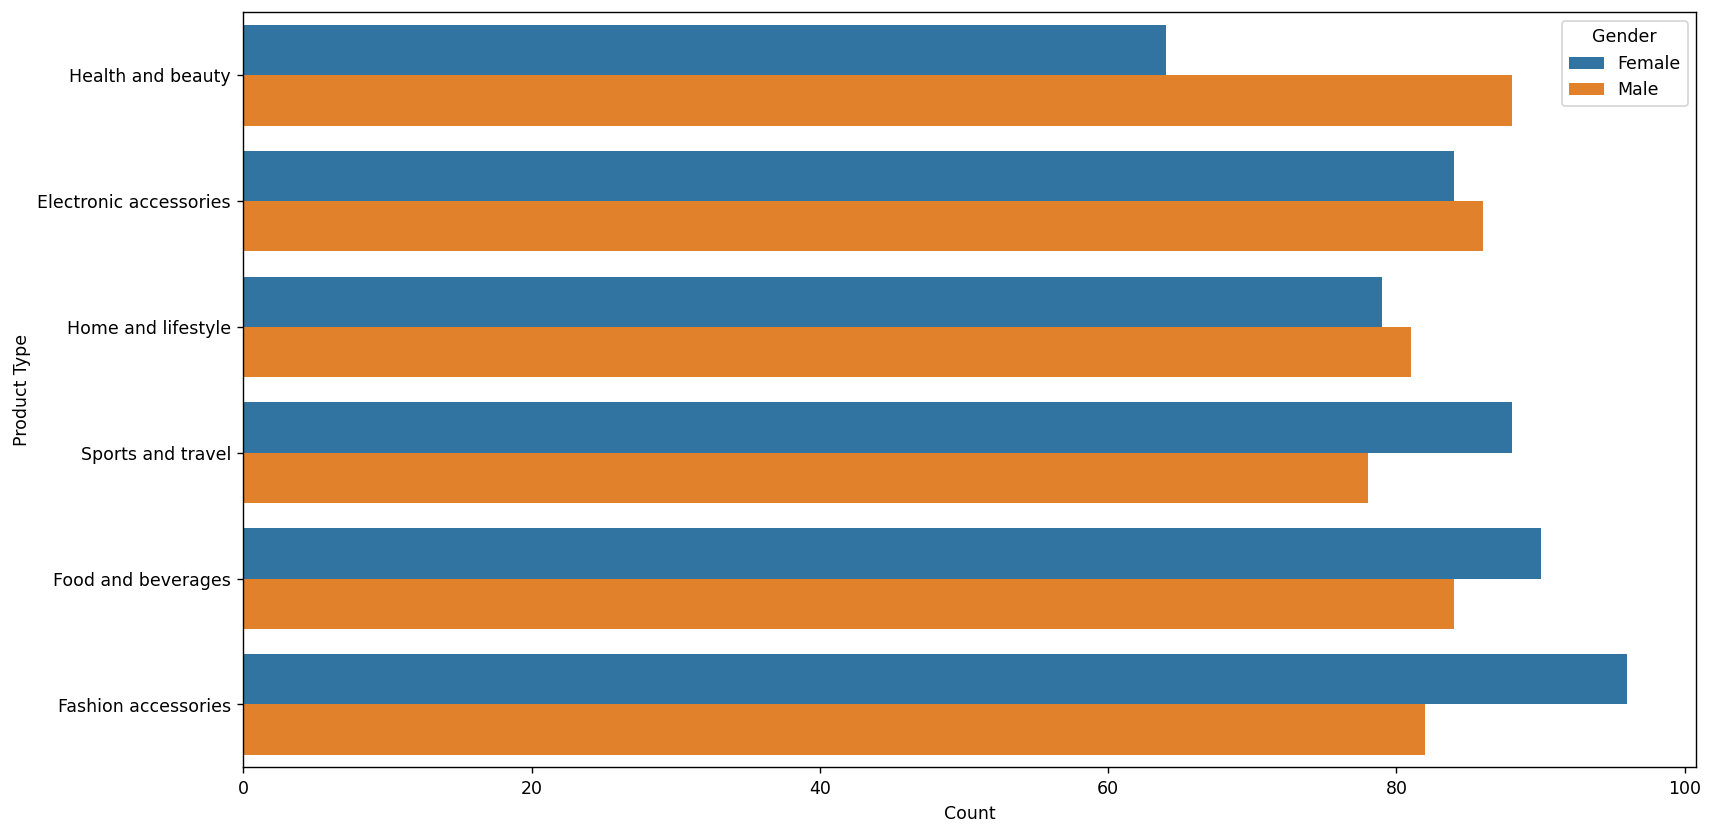

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

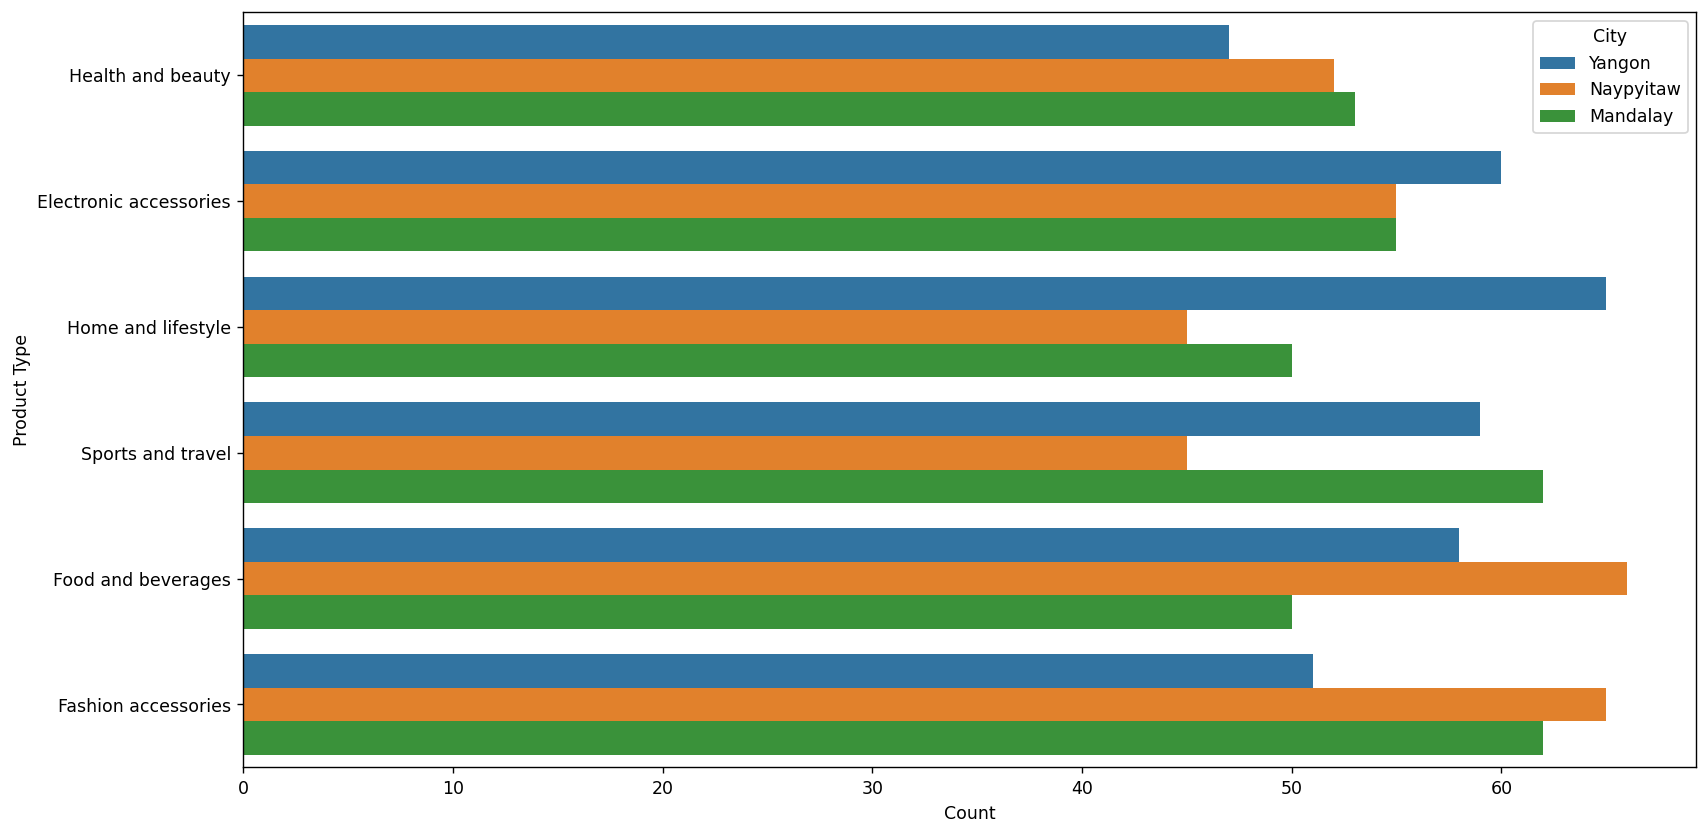

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

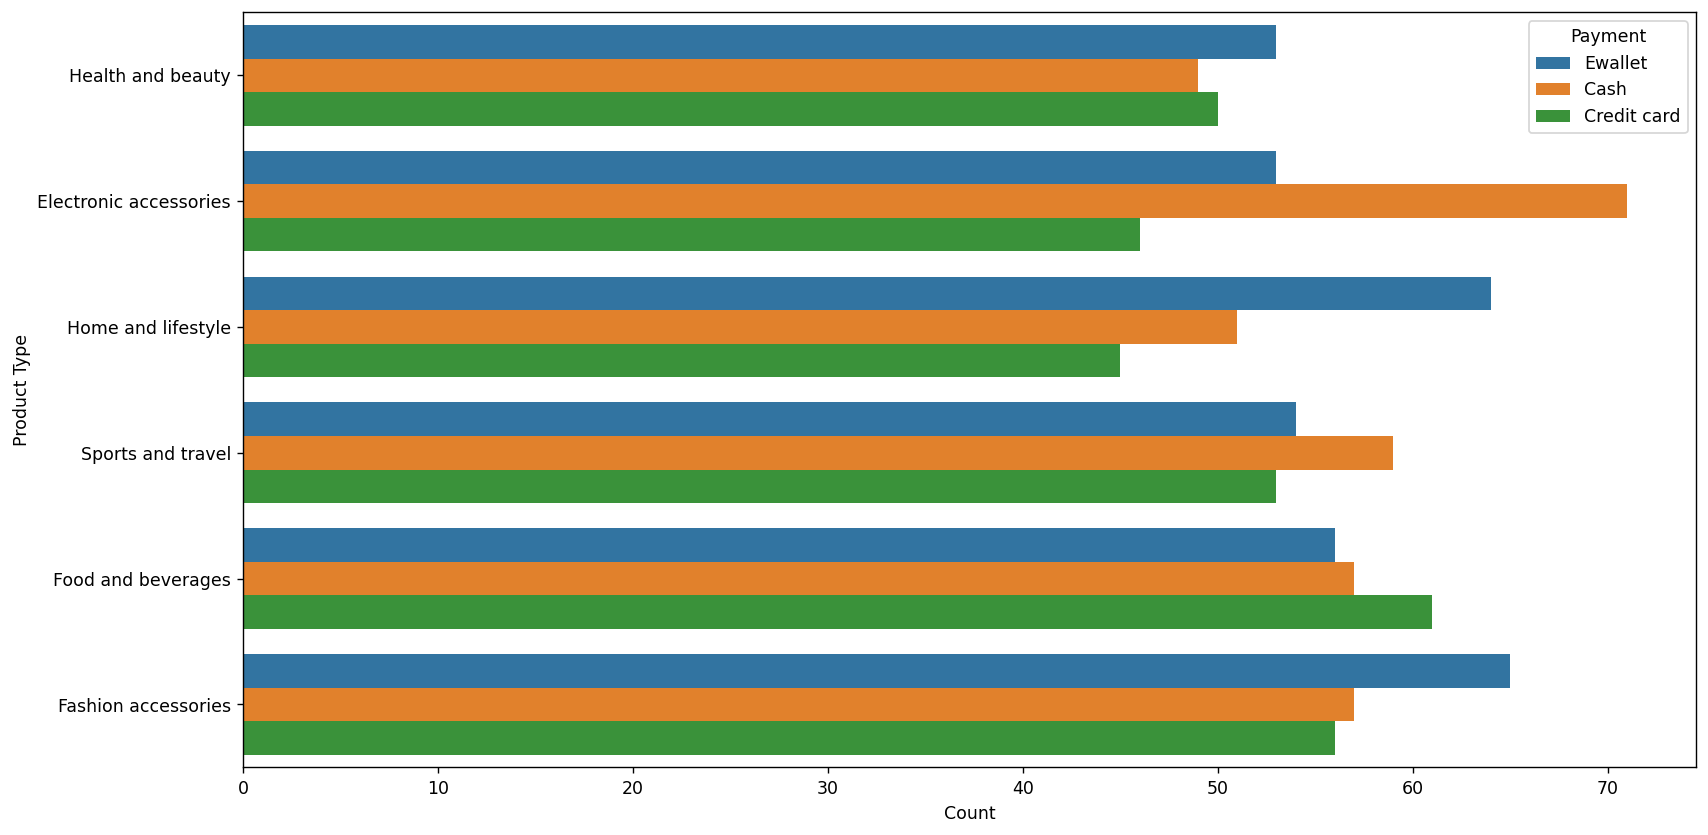

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

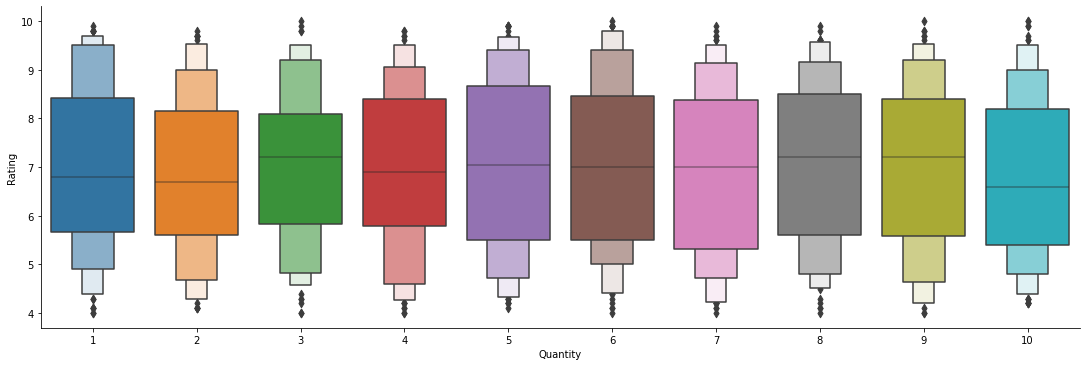

In [ ]:
sns.catplot(y ='Rating',x='Quantity', data = sales,kind='boxen',aspect=3) 
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.show()

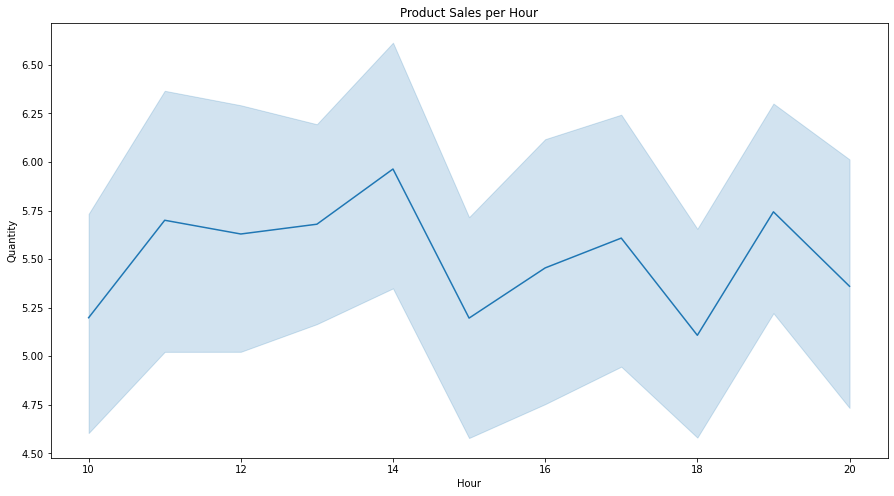

In [ ]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

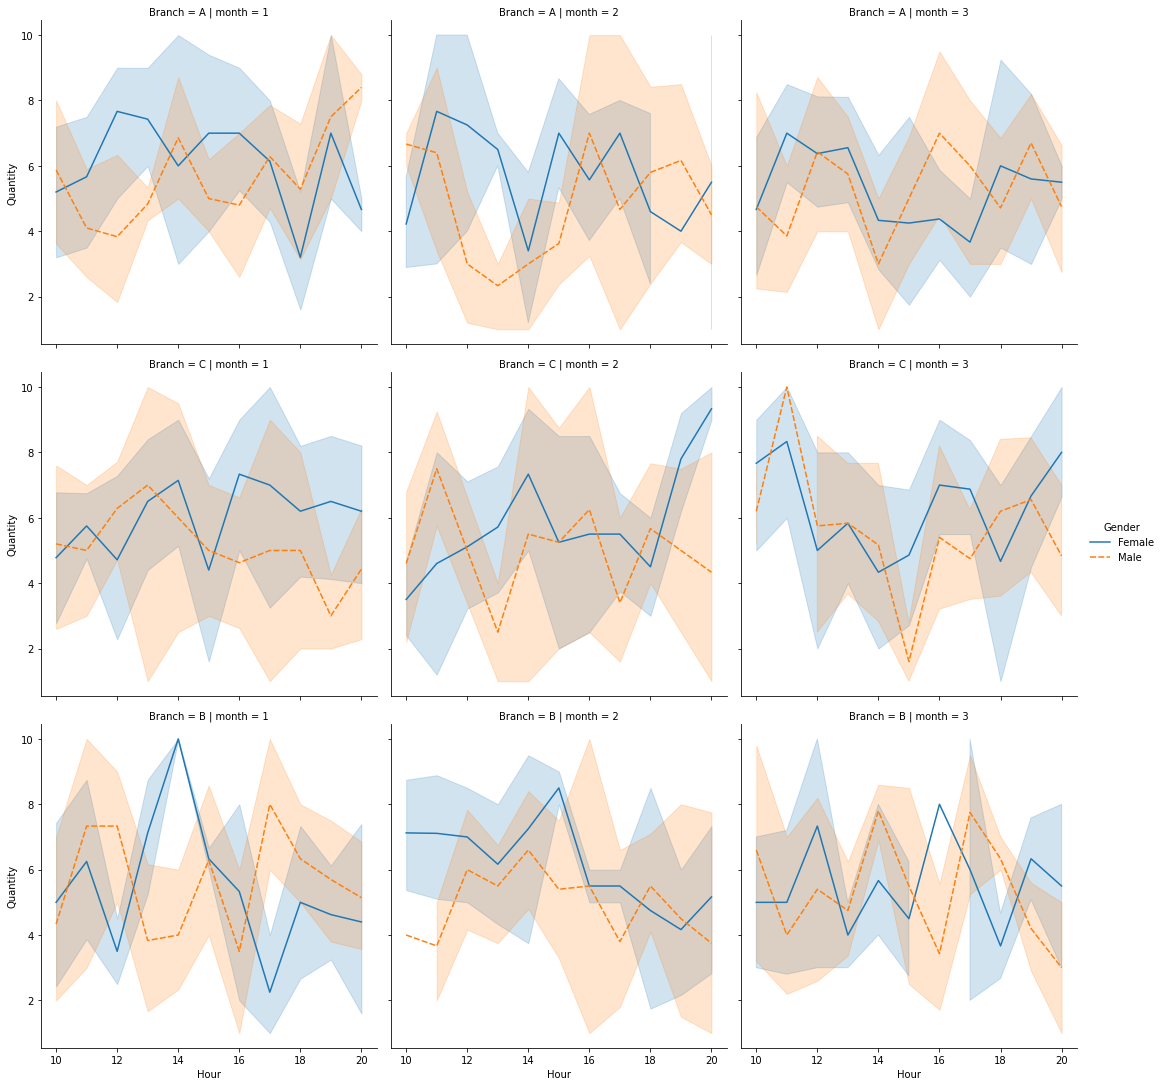

In [ ]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

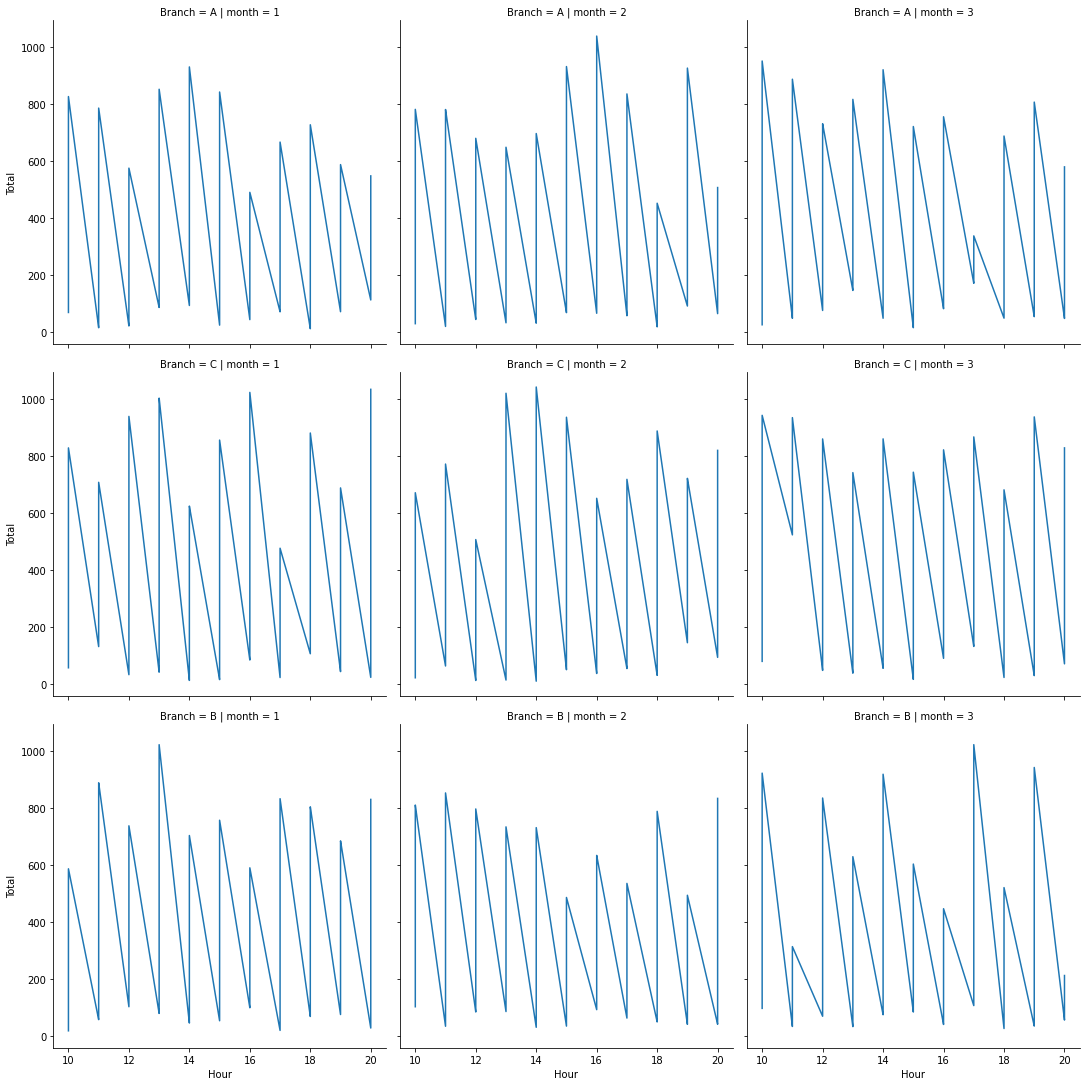

In [ ]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [ ]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305
